In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, preprocessing, model_selection, ensemble, pipeline
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score 
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_val_predict, cross_val_score, learning_curve, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support

/opt/anaconda3/lib/python3.9/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
import pandas as pd
df=pd.read_csv("df_scoring.csv")
df.head()

,Unnamed: 0,index,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,0,0,100002,1.0,0,0,0,0,202500.0,406597.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,100003,0.0,1,0,1,0,270000.0,1293502.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,100004,0.0,0,1,0,0,67500.0,135000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,100006,0.0,1,0,0,0,135000.0,312682.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,4,4,100007,0.0,0,0,0,0,121500.0,513000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_sample=df.sample(300)

In [4]:
# Isolement des 20 premières colonnes ayant le plus fort taux de corrélation

In [5]:
corr_matrix=df_sample.corr()
corr_matrix["TARGET"].sort_values(ascending=False)[:20]

TARGET                              1.000000
CC_AMT_BALANCE_MEAN                 0.416629
CC_AMT_RECIVABLE_MEAN               0.415743
CC_AMT_TOTAL_RECEIVABLE_MEAN        0.415742
CC_AMT_RECEIVABLE_PRINCIPAL_MEAN    0.413889
BURO_STATUS_1_MEAN_MEAN             0.411951
CC_AMT_BALANCE_SUM                  0.410587
CC_AMT_RECIVABLE_SUM                0.410108
CC_AMT_TOTAL_RECEIVABLE_SUM         0.410103
CC_AMT_RECEIVABLE_PRINCIPAL_SUM     0.409260
CC_AMT_INST_MIN_REGULARITY_MEAN     0.401854
CC_AMT_DRAWINGS_CURRENT_VAR         0.397496
CC_AMT_INST_MIN_REGULARITY_VAR      0.396763
CC_AMT_INST_MIN_REGULARITY_SUM      0.369794
CC_AMT_DRAWINGS_CURRENT_MAX         0.360673
CLOSED_AMT_ANNUITY_MEAN             0.348782
CC_AMT_DRAWINGS_POS_CURRENT_VAR     0.334793
CC_AMT_INST_MIN_REGULARITY_MAX      0.331149
CC_AMT_BALANCE_MAX                  0.330913
CC_AMT_RECIVABLE_MAX                0.329631
Name: TARGET, dtype: float64

In [6]:
col_list = ['TARGET', 'CC_CNT_DRAWINGS_CURRENT_MIN', 'CC_AMT_DRAWINGS_POS_CURRENT_VAR', 'CC_CNT_DRAWINGS_POS_CURRENT_MEAN', 'ACTIVE_AMT_ANNUITY_MEAN', 'CC_CNT_DRAWINGS_POS_CURRENT_MIN', 'CLOSED_AMT_ANNUITY_MEAN', 'CLOSED_AMT_ANNUITY_MAX', 'BURO_STATUS_0_MEAN_MEAN', 'ACTIVE_AMT_ANNUITY_MAX', 'BURO_AMT_ANNUITY_MAX', 'BURO_AMT_ANNUITY_MEAN','CC_AMT_DRAWINGS_CURRENT_VAR', 'CC_AMT_DRAWINGS_POS_CURRENT_MAX','CC_AMT_DRAWINGS_CURRENT_MEAN','BURO_CREDIT_TYPE_Another type of loan_MEAN', 'PREV_CODE_REJECT_REASON_VERIF_MEAN', 'PREV_CODE_REJECT_REASON_VERIF_MEAN', 'PREV_NAME_CASH_LOAN_PURPOSE_Purchase of electronic equipment_MEAN', 'CC_CNT_DRAWINGS_POS_CURRENT_MEAN', 'NAME_TYPE_SUITE_Group of people']

In [7]:
df=df_sample[col_list]

In [8]:
df= df[df['TARGET'].notna()]

In [9]:
df.head()

,TARGET,CC_CNT_DRAWINGS_CURRENT_MIN,CC_AMT_DRAWINGS_POS_CURRENT_VAR,CC_CNT_DRAWINGS_POS_CURRENT_MEAN,ACTIVE_AMT_ANNUITY_MEAN,CC_CNT_DRAWINGS_POS_CURRENT_MIN,CLOSED_AMT_ANNUITY_MEAN,CLOSED_AMT_ANNUITY_MAX,BURO_STATUS_0_MEAN_MEAN,ACTIVE_AMT_ANNUITY_MAX,...,BURO_AMT_ANNUITY_MEAN,CC_AMT_DRAWINGS_CURRENT_VAR,CC_AMT_DRAWINGS_POS_CURRENT_MAX,CC_AMT_DRAWINGS_CURRENT_MEAN,BURO_CREDIT_TYPE_Another type of loan_MEAN,PREV_CODE_REJECT_REASON_VERIF_MEAN,PREV_CODE_REJECT_REASON_VERIF_MEAN,PREV_NAME_CASH_LOAN_PURPOSE_Purchase of electronic equipment_MEAN,CC_CNT_DRAWINGS_POS_CURRENT_MEAN,NAME_TYPE_SUITE_Group of people
232215,1.0,0.0,1.644599e+06,0.145833,18000.0,0.0,20853.0,35194.5,0.747789,18000.0,...,19902.0,9.334380e+08,8847.45,7608.159375,0.0,0.0,0.0,0.0,0.145833,0
92892,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0
111796,0.0,0.0,0.000000e+00,0.000000,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,0
196942,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,NaN,0.000000,0.0,0.0,0.0,0.0,NaN,0
221300,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0


In [10]:
# Remplacer les valeurs manquantes dans toutes les colonnes sauf la première
df.iloc[:, 1:] = df.iloc[:, 1:].fillna(df.iloc[:, 1:].mean())

In [11]:
df.head()

,TARGET,CC_CNT_DRAWINGS_CURRENT_MIN,CC_AMT_DRAWINGS_POS_CURRENT_VAR,CC_CNT_DRAWINGS_POS_CURRENT_MEAN,ACTIVE_AMT_ANNUITY_MEAN,CC_CNT_DRAWINGS_POS_CURRENT_MIN,CLOSED_AMT_ANNUITY_MEAN,CLOSED_AMT_ANNUITY_MAX,BURO_STATUS_0_MEAN_MEAN,ACTIVE_AMT_ANNUITY_MAX,...,BURO_AMT_ANNUITY_MEAN,CC_AMT_DRAWINGS_CURRENT_VAR,CC_AMT_DRAWINGS_POS_CURRENT_MAX,CC_AMT_DRAWINGS_CURRENT_MEAN,BURO_CREDIT_TYPE_Another type of loan_MEAN,PREV_CODE_REJECT_REASON_VERIF_MEAN,PREV_CODE_REJECT_REASON_VERIF_MEAN,PREV_NAME_CASH_LOAN_PURPOSE_Purchase of electronic equipment_MEAN,CC_CNT_DRAWINGS_POS_CURRENT_MEAN,NAME_TYPE_SUITE_Group of people
232215,1.0,0.000000,1.644599e+06,0.145833,18000.000000,0.000000,20853.000000,35194.500000,0.747789,18000.000000,...,19902.000000,9.334380e+08,8847.450000,7608.159375,0.0,0.0,0.0,0.0,0.145833,0
92892,1.0,0.065789,6.161416e+08,1.096847,13651.456867,0.115385,6577.477961,9704.169167,0.456575,19127.506224,...,11561.887872,2.032604e+09,43973.084423,14180.855698,0.0,0.0,0.0,0.0,1.096847,0
111796,0.0,0.000000,0.000000e+00,0.000000,13651.456867,0.000000,6577.477961,9704.169167,0.456575,19127.506224,...,11561.887872,0.000000e+00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0
196942,0.0,0.000000,6.161416e+08,1.096847,13651.456867,0.115385,6577.477961,9704.169167,0.456575,19127.506224,...,11561.887872,0.000000e+00,43973.084423,0.000000,0.0,0.0,0.0,0.0,1.096847,0
221300,0.0,0.065789,6.161416e+08,1.096847,13651.456867,0.115385,6577.477961,9704.169167,0.456575,19127.506224,...,11561.887872,2.032604e+09,43973.084423,14180.855698,0.0,0.0,0.0,0.0,1.096847,0


In [12]:
df['TARGET'] = df['TARGET'].astype(int)

In [13]:
# Vérifier s'il y a des valeurs manquantes dans la première colonne
missing_values = df['TARGET'].isna().any()

# Afficher le résultat
print('Valeurs manquantes dans la colonne TARGET ? :', missing_values)

Valeurs manquantes dans la colonne TARGET ? : False


In [14]:
# Spécificité des valeurs comprises dans la colonne TARGET
df['TARGET'].unique()

array([1, 0])

# Séparation des données

In [15]:
from sklearn.model_selection import train_test_split

# Extraire la variable cible
y = df.iloc[:, 0] # la première colonne est la variable cible

# Extraire les variables explicatives
X = df.iloc[:, 1:] # toutes les colonnes sauf la première sont les variables explicatives

# Diviser les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Afficher la taille des ensembles de données
print("Taille de X_train :", X_train.shape)
print("Taille de X_test :", X_test.shape)
print("Taille de y_train :", y_train.shape)
print("Taille de y_test :", y_test.shape)

Taille de X_train : (208, 20)
Taille de X_test : (53, 20)
Taille de y_train : (208,)
Taille de y_test : (53,)


# Egalisation des labels 1 et 0 de la TARGET

In [17]:
print("Label 1, Avant utilisation RandomOverSampling: {} ".format(sum(y_train==1)))
print("Label 0, Après utilisation RandomOverSampling: {} ".format(sum(y_train==0)))

Label 1, Avant utilisation RandomOverSampling: 22 
Label 0, Après utilisation RandomOverSampling: 186 


In [18]:
# Utiliser la technique de sur-échantillonnage aléatoire pour équilibrer les classes
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [19]:
# Afficher le nombre d'échantillons dans chaque classe avant et après RandomOverSampling
print("Avant RandomOverSampling :")
print(y_train.value_counts())
print("\nAprès RandomOverSampling :")
print(y_train_resampled.value_counts())

Avant RandomOverSampling :
0    186
1     22
Name: TARGET, dtype: int64

Après RandomOverSampling :
0    186
1    186
Name: TARGET, dtype: int64


In [20]:
# Spécificité des valeurs comprises dans la colonne TARGET
df['TARGET'].unique()

array([1, 0])

In [21]:
X_train=X_train_resampled
y_train=y_train_resampled

In [22]:
X_train.shape

(372, 20)

In [23]:
y_train.shape

(372,)

# Préprocessing des données

#### Phase de standardisation des variables X_train et X_test

In [24]:
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Application d'une régression logistique

In [25]:
lr = LogisticRegression()

# Entraîner le classifieur sur les données d'entraînement
lr.fit(X_train_scaled, y_train)

# Faire des prédictions sur les données de test
y_pred = lr.predict(X_test_scaled)

# Calculer l'accuracy des prédictions
accuracy_lr = accuracy_score(y_test, y_pred)
print("Accuracy : ", accuracy_lr)

Accuracy :  0.8113207547169812


In [26]:
# Calculer les scores pour la régression logistique
y_pred = lr.predict(X_test_scaled)
precision_logreg, recall_logreg, f1_score_logreg, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print("Régression logistique - Précision : {:.2f}, Rappel : {:.2f}, F1-score : {:.2f}".format(precision_logreg, recall_logreg, f1_score_logreg))

Régression logistique - Précision : 0.17, Rappel : 1.00, F1-score : 0.29


#### Validation croisée

In [27]:
from sklearn.model_selection import GridSearchCV

# Créer un objet GridSearchCV pour la régression logistique en utilisant une grille de paramètres à tester
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

# Adapter le modèle sur les données d'apprentissage et évaluer sa performance en utilisant la validation croisée
grid_search.fit(X_train_scaled, y_train)
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleure précision de validation croisée : ", grid_search.best_score_)

# Utiliser le modèle pour prédire les valeurs de la variable cible dans l'ensemble de test
y_pred = grid_search.predict(X_test_scaled)

# Évaluer la performance du modèle en utilisant la précision et la matrice de confusion
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Précision : ", accuracy)

Meilleurs paramètres :  {'C': 10, 'penalty': 'l2'}
Meilleure précision de validation croisée :  0.5645765765765767
Précision :  0.8113207547169812


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

#### Classification Report

In [28]:
from sklearn.metrics import classification_report

# Afficher le rapport de classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        51
           1       0.17      1.00      0.29         2

    accuracy                           0.81        53
   macro avg       0.58      0.90      0.59        53
weighted avg       0.97      0.81      0.87        53



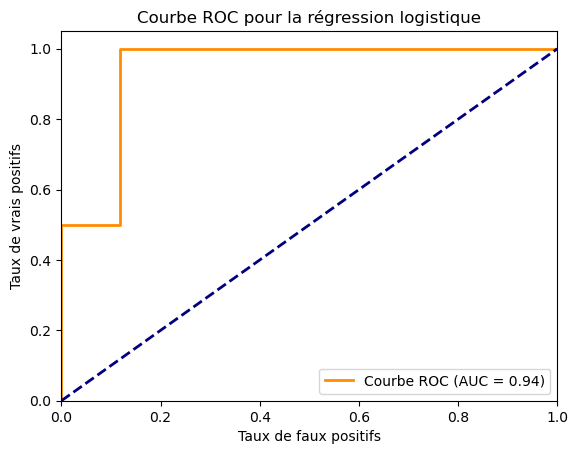

In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculer la probabilité des prédictions pour les données de test
y_prob = grid_search.predict_proba(X_test_scaled)[:,1]

# Calculer la courbe ROC et l'aire sous la courbe (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Afficher la courbe ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC pour la régression logistique')
plt.legend(loc="lower right")
plt.show()

Vrai négatif (TN) :  41
Faux positif (FP) :  10
Faux négatif (FN) :  0
Vrai positif (TP) :  2
Matrice de confusion:
 [[41 10]
 [ 0  2]]


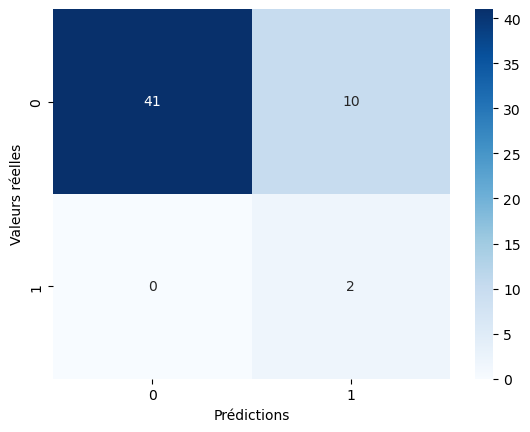

In [30]:
# supposons que y_true est la variable contenant les vraies étiquettes et y_pred est la variable contenant les prédictions du modèle
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# affichage des résultats
print("Vrai négatif (TN) : ", tn)
print("Faux positif (FP) : ", fp)
print("Faux négatif (FN) : ", fn)
print("Vrai positif (TP) : ", tp)

# calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# affichage de la matrice de confusion
print('Matrice de confusion:\n', cm)

# création de la heatmap avec Seaborn
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

# personnalisation des labels des axes x et y
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')

# affichage de la figure
plt.show()

### Approche métier

In [31]:
def cost_function(y_test, y_pred):
    # Calcul du nombre de faux positifs et de faux négatifs
    fp = ((y_test == 0) & (y_pred == 1)).sum()
    fn = ((y_test == 1) & (y_pred == 0)).sum()

    # Calcul du coût en fonction du nombre de faux positifs et de faux négatifs
    cost = fp + 10 * fn

    return cost

import numpy as np

#y_test = np.array([0, 1, 0, 1, 0])
#y_pred = np.array([1, 1, 0, 0, 1])

cost_lr = cost_function(y_test, y_pred)
print(cost_lr)

10


# Application d'une méthode par arbre de décision

In [32]:
# Création de l'objet DecisionTreeClassifier et ajustement aux données d'entraînement
tree = DecisionTreeClassifier()
tree.fit(X_train_scaled, y_train)

# Prédictions sur les données de test
y_pred = tree.predict(X_test_scaled)

# Calcul de l'accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy :", acc)

Accuracy : 0.49056603773584906


#### Validation croisée

In [33]:
# Définir les paramètres à tester pour l'arbre de décision
param_grid = {'max_depth': [1, 2, 3, 4, 5],
              'min_samples_split': [2, 3, 4, 5],
              'min_samples_leaf': [1, 2, 3, 4, 5]}

# Créer un objet GridSearchCV pour l'arbre de décision en utilisant une grille de paramètres à tester
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

# Adapter le modèle sur les données d'apprentissage et évaluer sa performance en utilisant la validation croisée
grid_search.fit(X_train_scaled, y_train)
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleure précision de validation croisée : ", grid_search.best_score_)

# Utiliser le modèle pour prédire les valeurs de la variable cible dans l'ensemble de test
y_pred = grid_search.predict(X_test_scaled)

# Évaluer la performance du modèle en utilisant la précision et la matrice de confusion
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Précision : ", accuracy)

Meilleurs paramètres :  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Meilleure précision de validation croisée :  0.6531891891891892
Précision :  0.37735849056603776


#### Classification Report

In [34]:
from sklearn.metrics import classification_report

# Afficher le rapport de classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.37      0.54        51
           1       0.03      0.50      0.06         2

    accuracy                           0.38        53
   macro avg       0.49      0.44      0.30        53
weighted avg       0.92      0.38      0.52        53



#### Représentation graphique de l'AUC

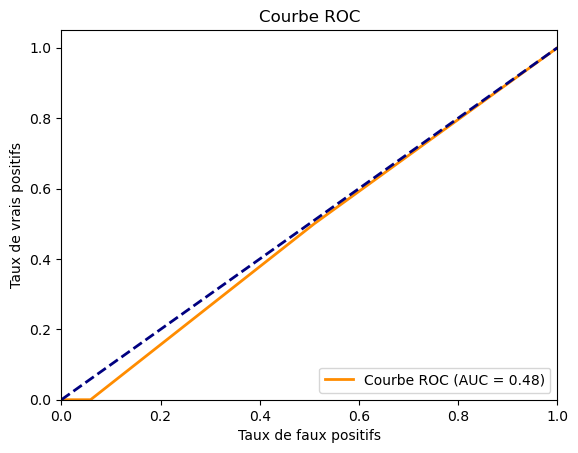

In [35]:
# Calculer les probabilités prédites pour l'ensemble de test
y_proba = tree.predict_proba(X_test_scaled)[:, 1]

# Calculer la courbe ROC et l'AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Afficher la courbe ROC
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

Vrai négatif (TN) :  19
Faux positif (FP) :  32
Faux négatif (FN) :  1
Vrai positif (TP) :  1
Matrice de confusion:
 [[19 32]
 [ 1  1]]


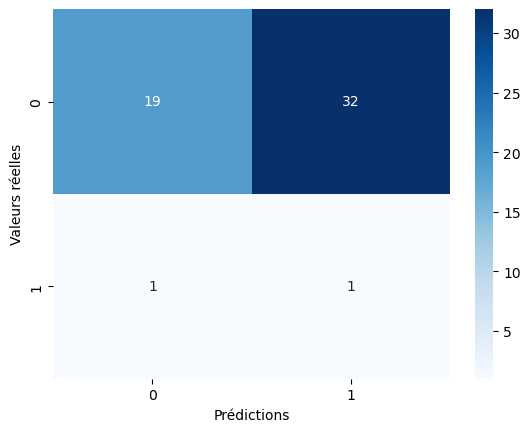

In [36]:
# supposons que y_true est la variable contenant les vraies étiquettes et y_pred est la variable contenant les prédictions du modèle
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# affichage des résultats
print("Vrai négatif (TN) : ", tn)
print("Faux positif (FP) : ", fp)
print("Faux négatif (FN) : ", fn)
print("Vrai positif (TP) : ", tp)

# calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# affichage de la matrice de confusion
print('Matrice de confusion:\n', cm)

# création de la heatmap avec Seaborn
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

# personnalisation des labels des axes x et y
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')

# affichage de la figure
plt.show()

In [37]:
# supposons que y_true est la variable contenant les vraies étiquettes et y_pred est la variable contenant les prédictions du modèle
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# affichage des résultats
print("Vrai négatif (TN) : ", tn)
print("Faux positif (FP) : ", fp)
print("Faux négatif (FN) : ", fn)
print("Vrai positif (TP) : ", tp)

Vrai négatif (TN) :  19
Faux positif (FP) :  32
Faux négatif (FN) :  1
Vrai positif (TP) :  1


### Approche métier

In [38]:
def cost_function(y_test, y_pred):
    # Calcul du nombre de faux positifs et de faux négatifs
    fp = ((y_test == 0) & (y_pred == 1)).sum()
    fn = ((y_test == 1) & (y_pred == 0)).sum()

    # Calcul du coût en fonction du nombre de faux positifs et de faux négatifs
    cost = fp + 10 * fn

    return cost

import numpy as np

#y_test = np.array([0, 1, 0, 1, 0])
#y_pred = np.array([1, 1, 0, 0, 1])

cost_dt = cost_function(y_test, y_pred)
print(cost_dt)

42


# Application d'une méthode par forêt aléatoire

In [39]:
# Créer et ajuster le modèle de classification
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

# Faire des prédictions sur les données de test
y_pred = rf.predict(X_test_scaled)

# Calculer l'accuracy des prédictions
accuracy = accuracy_score(y_test, y_pred)
# Évaluation du modèle
print("Accuracy : ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:,1])
print('AUC : %0.4f' %roc_auc)

Accuracy :  0.49056603773584906
              precision    recall  f1-score   support

           0       0.93      0.51      0.66        51
           1       0.00      0.00      0.00         2

    accuracy                           0.49        53
   macro avg       0.46      0.25      0.33        53
weighted avg       0.89      0.49      0.63        53

AUC : 0.3137


#### Validation croisée

In [40]:
# Créer le modèle de classification
rf = RandomForestClassifier()

# Effectuer une validation croisée sur le modèle
scores = cross_val_score(rf, X_train_scaled, y_train, cv=5)

# Évaluer la performance du modèle en utilisant la précision et la matrice de confusion
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Précision : ", accuracy)
# Évaluer la performance du modèle en utilisant la précision et la matrice de confusion
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

Précision :  0.49056603773584906


#### Classification report

In [41]:
from sklearn.metrics import classification_report

# Afficher le rapport de classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.51      0.66        51
           1       0.00      0.00      0.00         2

    accuracy                           0.49        53
   macro avg       0.46      0.25      0.33        53
weighted avg       0.89      0.49      0.63        53



#### Représentation graphique de l'AUC

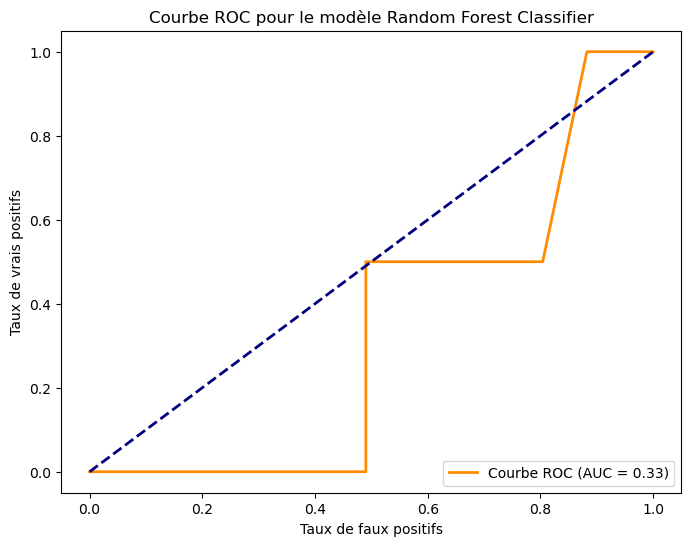

In [42]:
# Créer et ajuster le modèle de classification
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

# Faire des prédictions sur les données de test
y_pred_proba = rf.predict_proba(X_test_scaled)[:,1]

# Calculer la courbe ROC et l'aire sous la courbe (AUC)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Afficher la courbe ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC pour le modèle Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

Vrai négatif (TN) :  26
Faux positif (FP) :  25
Faux négatif (FN) :  2
Vrai positif (TP) :  0
Matrice de confusion:
 [[26 25]
 [ 2  0]]


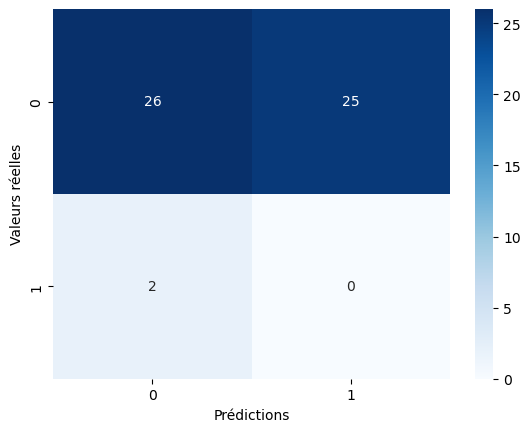

In [43]:
# supposons que y_true est la variable contenant les vraies étiquettes et y_pred est la variable contenant les prédictions du modèle
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# affichage des résultats
print("Vrai négatif (TN) : ", tn)
print("Faux positif (FP) : ", fp)
print("Faux négatif (FN) : ", fn)
print("Vrai positif (TP) : ", tp)

# calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# affichage de la matrice de confusion
print('Matrice de confusion:\n', cm)

# création de la heatmap avec Seaborn
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

# personnalisation des labels des axes x et y
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')

# affichage de la figure
plt.show()

### Approche métier

In [44]:
def cost_function(y_test, y_pred):
    # Calcul du nombre de faux positifs et de faux négatifs
    fp = ((y_test == 0) & (y_pred == 1)).sum()
    fn = ((y_test == 1) & (y_pred == 0)).sum()

    # Calcul du coût en fonction du nombre de faux positifs et de faux négatifs
    cost = fp + 10 * fn

    return cost

import numpy as np

#y_test = np.array([0, 1, 0, 1, 0])
#y_pred = np.array([1, 1, 0, 0, 1])

cost_rf = cost_function(y_test, y_pred)
print(cost_rf)

45


# Application d'une méthode par XGBoost

In [45]:
# Instancier un classifieur XGBoost
xgb = XGBClassifier()

# Entraîner le classifieur sur les données d'entraînement
xgb.fit(X_train_scaled, y_train)

# Faire des prédictions sur les données de test
y_pred = xgb.predict(X_test_scaled)

# Calculer l'accuracy des prédictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : ", accuracy)

Accuracy :  0.49056603773584906


#### Classification Report

In [46]:
# Afficher le classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.49      0.65        51
           1       0.04      0.50      0.07         2

    accuracy                           0.49        53
   macro avg       0.50      0.50      0.36        53
weighted avg       0.93      0.49      0.63        53



#### Validation croisée

In [47]:
params = {'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [3, 4, 5]}
grid_search = GridSearchCV(xgb, params, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleur score : ", grid_search.best_score_)
print("Précision : ", accuracy)

Meilleurs paramètres :  {'learning_rate': 0.3, 'max_depth': 3}
Meilleur score :  0.7179819819819819
Précision :  0.49056603773584906


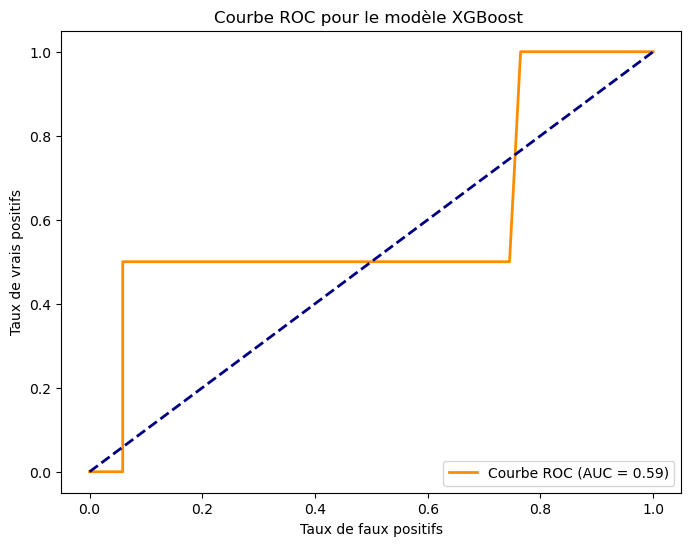

In [48]:
# Faire des prédictions sur les données de test
y_pred_proba = xgb.predict_proba(X_test_scaled)[:,1]

# Calculer la courbe ROC et l'aire sous la courbe (AUC)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Afficher la courbe ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC pour le modèle XGBoost ')
plt.legend(loc="lower right")
plt.show()

#### Matrice de confusion

Vrai négatif (TN) :  25
Faux positif (FP) :  26
Faux négatif (FN) :  1
Vrai positif (TP) :  1
Matrice de confusion:
 [[25 26]
 [ 1  1]]


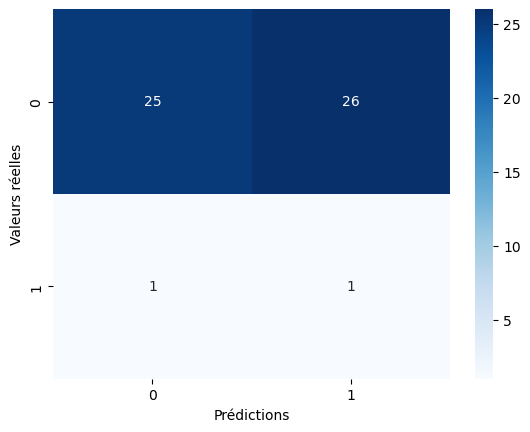

In [49]:
# supposons que y_true est la variable contenant les vraies étiquettes et y_pred est la variable contenant les prédictions du modèle
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# affichage des résultats
print("Vrai négatif (TN) : ", tn)
print("Faux positif (FP) : ", fp)
print("Faux négatif (FN) : ", fn)
print("Vrai positif (TP) : ", tp)

# calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# affichage de la matrice de confusion
print('Matrice de confusion:\n', cm)

# création de la heatmap avec Seaborn
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

# personnalisation des labels des axes x et y
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')

# affichage de la figure
plt.show()

### Approche métier

In [50]:
def cost_function(y_test, y_pred):
    # Calcul du nombre de faux positifs et de faux négatifs
    fp = ((y_test == 0) & (y_pred == 1)).sum()
    fn = ((y_test == 1) & (y_pred == 0)).sum()

    # Calcul du coût en fonction du nombre de faux positifs et de faux négatifs
    cost = fp + 10 * fn

    return cost

import numpy as np

#y_test = np.array([0, 1, 0, 1, 0])
#y_pred = np.array([1, 1, 0, 0, 1])

cost_xgb = cost_function(y_test, y_pred)
print(cost_xgb)

36


# Application d'une méthode par SVC

In [51]:
# Créer un modèle SVM
svc = SVC(kernel='linear', C=1, probability=True, random_state=42)

# Entraîner le modèle sur les données d'entraînement
svc.fit(X_train_scaled, y_train)

# Faire des prédictions sur les données de test
y_pred = svc.predict(X_test_scaled)

# Calculer l'accuracy des prédictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : ", accuracy)

Accuracy :  0.8490566037735849


#### Classification report

In [52]:
# Afficher le classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        51
           1       0.20      1.00      0.33         2

    accuracy                           0.85        53
   macro avg       0.60      0.92      0.62        53
weighted avg       0.97      0.85      0.89        53



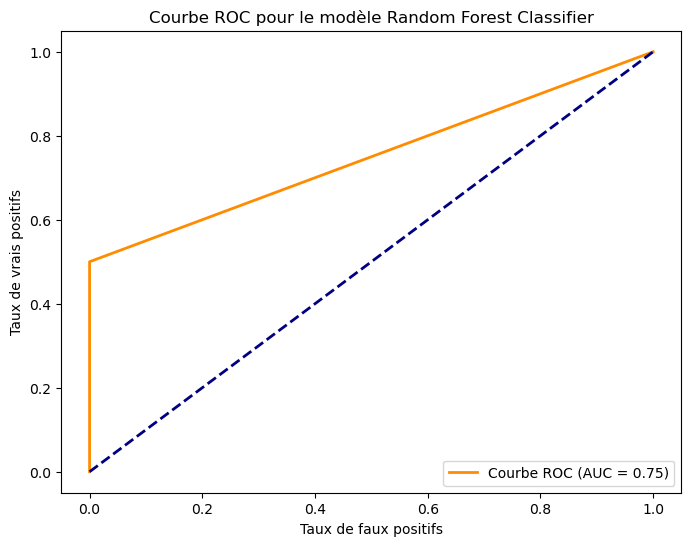

In [53]:
# Créer et ajuster le modèle de classification
svc = SVC(kernel='linear', C=1, probability=True, random_state=42)
svc.fit(X_train_scaled, y_train)

# Faire des prédictions sur les données de test
y_pred_proba = svc.predict_proba(X_test_scaled)[:,1]

# Calculer la courbe ROC et l'aire sous la courbe (AUC)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Afficher la courbe ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC pour le modèle Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

# Evaluation des modèles

In [54]:
# Régression Logistique
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Arbre de Décision
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Forêt Aléatoire
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# SVC
svc = SVC(random_state=42, probability=True)
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)

# Afficher les résultats
print("Régression Logistique:")
print("Accuracy : ", accuracy_lr)
print("Précision : ", precision_lr)
print("Rappel : ", recall_lr)
print("F1-Score : ", f1_lr)
print()
print("Arbre de Décision:")
print("Accuracy : ", accuracy_dt)
print("Précision : ", precision_dt)
print("Rappel : ", recall_dt)
print("F1-Score : ", f1_dt)
print()
print("Forêt Aléatoire:")
print("Accuracy : ", accuracy_rf)
print("Précision : ", precision_rf)
print("Rappel : ", recall_rf)
print("F1-Score : ", f1_rf)
print()
print("XGBoost:")
print("Accuracy : ", accuracy_xgb)
print("Précision : ", precision_xgb)
print("Rappel : ", recall_xgb)
print("F1-Score : ", f1_xgb)
print()
print("SVC:")
print("Accuracy : ", accuracy_svc)
print("Précision : ", precision_svc)
print("Rappel : ", recall_svc)
print("F1-Score : ", f1_svc)

Régression Logistique:
Accuracy :  0.8113207547169812
Précision :  0.16666666666666666
Rappel :  1.0
F1-Score :  0.2857142857142857

Arbre de Décision:
Accuracy :  0.5094339622641509
Précision :  0.038461538461538464
Rappel :  0.5
F1-Score :  0.07142857142857144

Forêt Aléatoire:
Accuracy :  0.49056603773584906
Précision :  0.0
Rappel :  0.0
F1-Score :  0.0

XGBoost:
Accuracy :  0.49056603773584906
Précision :  0.037037037037037035
Rappel :  0.5
F1-Score :  0.06896551724137931

SVC:
Accuracy :  0.41509433962264153
Précision :  0.0
Rappel :  0.0
F1-Score :  0.0


In [55]:
import pandas as pd

# Création d'un dictionnaire de données avec 6 colonnes
data = {
        'Modèle': ['Régression Logistique', 'DecisionTreeClassifier', 'RandomForestClassifier', 'XGBoost', 'SVC'],
        'Accuracy': [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_xgb, accuracy_svc],
        'Précision': [precision_rf, precision_dt, precision_rf, precision_xgb, precision_svc],
        'Rappel': [recall_lr, recall_dt, recall_rf, recall_xgb, recall_svc],
        'F1-Score': [f1_lr, f1_dt, f1_rf, f1_xgb, f1_svc],
        'Coût risqué': [cost_lr, cost_dt, cost_rf, cost_xgb, np.nan]
       }

# Création du DataFrame à partir du dictionnaire de données
df = pd.DataFrame(data)

# Affichage du DataFrame
print(df)

                   Modèle  Accuracy  Précision  Rappel  F1-Score  Coût risqué
0   Régression Logistique  0.811321   0.000000     1.0  0.285714         10.0
1  DecisionTreeClassifier  0.509434   0.038462     0.5  0.071429         42.0
2  RandomForestClassifier  0.490566   0.000000     0.0  0.000000         45.0
3                 XGBoost  0.490566   0.037037     0.5  0.068966         36.0
4                     SVC  0.415094   0.000000     0.0  0.000000          NaN


In [56]:
df.head()

,Modèle,Accuracy,Précision,Rappel,F1-Score,Coût risqué
0,Régression Logistique,0.811321,0.000000,1.0,0.285714,10.0
1,DecisionTreeClassifier,0.509434,0.038462,0.5,0.071429,42.0
2,RandomForestClassifier,0.490566,0.000000,0.0,0.000000,45.0
3,XGBoost,0.490566,0.037037,0.5,0.068966,36.0
4,SVC,0.415094,0.000000,0.0,0.000000,NaN


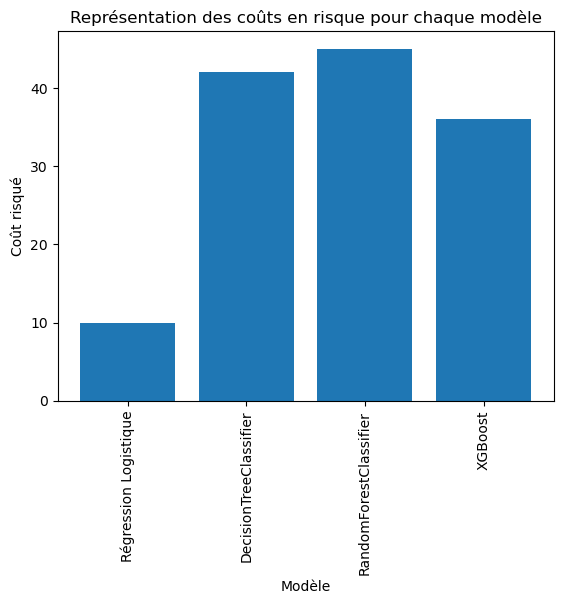

In [57]:
# Tracé d'un graphique à barres
plt.bar(df['Modèle'], df['Coût risqué'])
plt.title('Représentation des coûts en risque pour chaque modèle')
plt.xlabel('Modèle')
plt.ylabel('Coût risqué')
plt.xticks(rotation=90)
plt.show()

In [58]:
from pickle import dump, load
with open("model.pickle", "wb") as file:
    dump(svc,file)

In [60]:
with open("model.pickle", "rb") as file:
    model=load(file)

In [62]:
import requests